Beginning of Tutorial 6

We import the libraries, and set up the plotting parameters:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 20, 'axes.grid': True})

### Question 1
### You are given a data:
| $x$ | $y$ |
| :----: | :----: |
| 0 | -1.0 |
| 1 | 0.2 |
| 2 | 0.9 |
| 3 | 2.1 |

### and a code, t6q1.py that implements the least squares fitting to the data. A png graph is also produced. Run the code to understand the python code.

#### Q1 Answer:

The first method that we'll be applying in this tutorial is what i call the 'direct formula' method, which does not call any library. We will only be using the data points, and obtain the parameters that we need.

The formulae that will be used here are:

$$
\begin{aligned}
m &= \frac{n\sum_n xy-\sum_n x\sum_n y}{n\sum_n x^2-\left(\sum_n x\right)^2}
\\
c &= \frac{\sum_n y-m\sum_n x}{n}
\end{aligned}
$$

The error of the gradient, $\Delta m$:
$$
\begin{aligned}
\Delta m = \Delta y\sqrt{\frac{n}{n\sum_n x^2-\left(\sum_n x\right)^2}}
\end{aligned}
$$
The error of the y-intercept, $\Delta c$:
$$
\begin{aligned}
\Delta c = \Delta y\sqrt{\frac{\sum_n x^2}{n\sum_n x^2-\left(\sum_n x\right)^2}}
\end{aligned}
$$

where $\Delta y =\sqrt{\frac{\sum_n\left(y_i-mx_i-c\right)^2}{n-2}}$

The parameter that tests for the correlation is the Pearson coefficient, with the formula:
$$R^2=1-\frac{RSS}{TSS}$$

with Residual sum of squares, $RSS=\sum_n\left(y_i-m x_i - c\right)^2$

and Total sum of squares, $TSS=\sum_n\left(y_i-\bar y\right)^2$

Gradient of the best fit line = 1.0000 ± 0.071
y-intercept of the best fit line = -0.9500 ± 0.13
RSS = 0.0500
TSS = 5.0500
R^2 = 0.9901


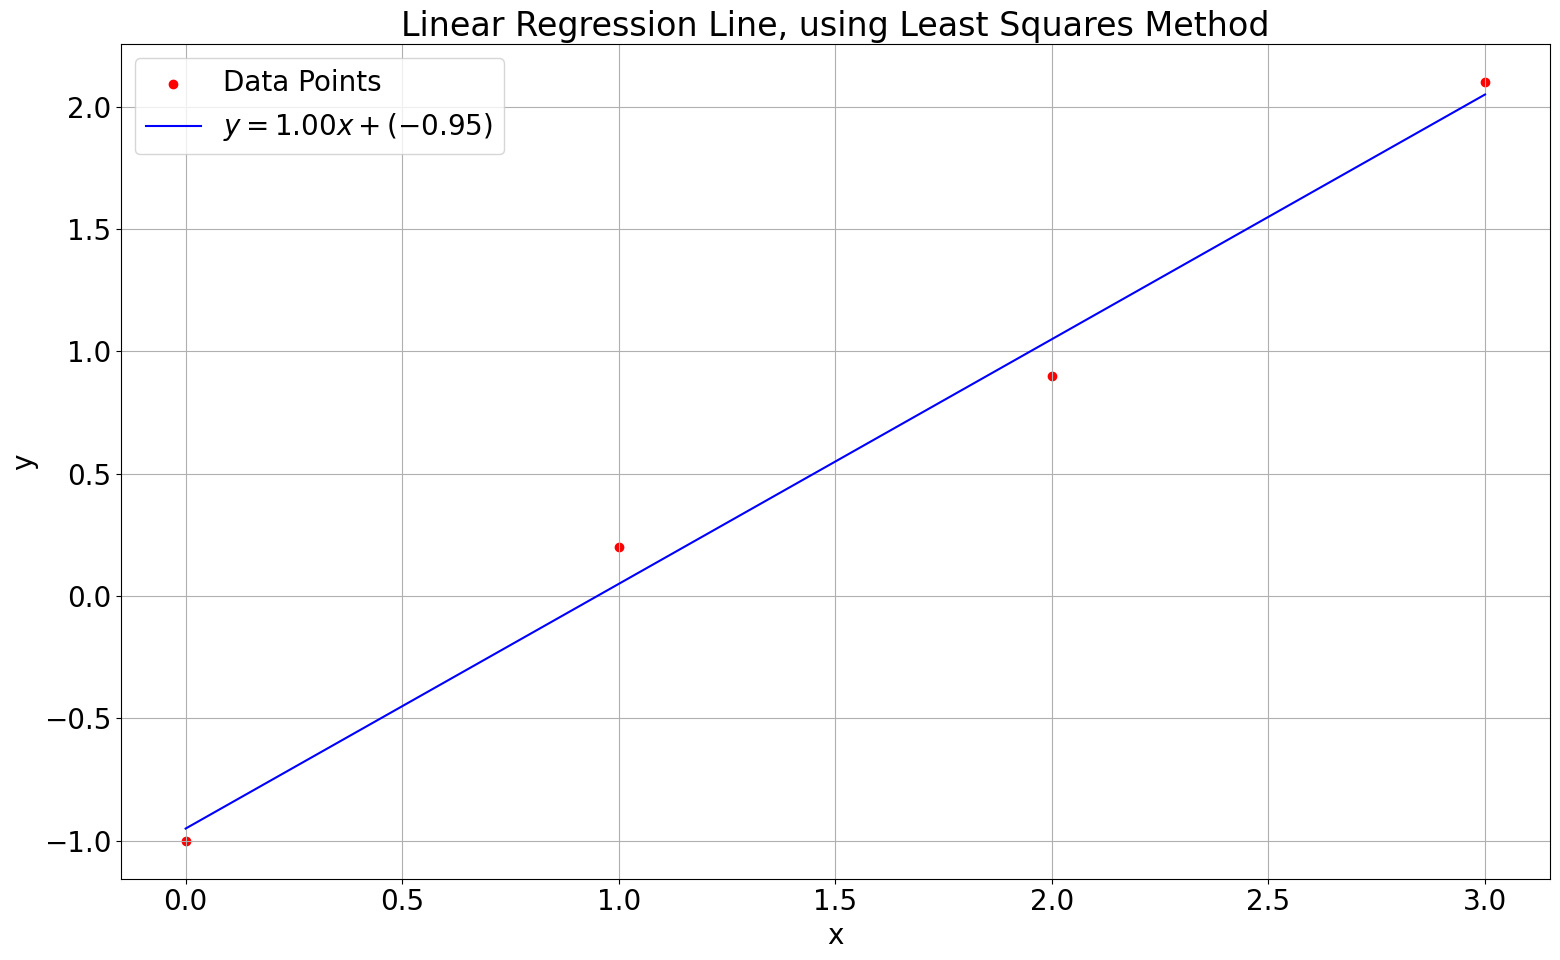

In [2]:
# Input data
x_data = np.array([0, 1, 2, 3])
y_data = np.array([-1.0, 0.2, 0.9, 2.1])

# Number of points
n = len(x_data)

# Calculate the gradient (m) and y-intercept (c) of the fit line
m = (n * np.sum(x_data * y_data) - np.sum(x_data) * np.sum(y_data)) / (n * np.sum(x_data ** 2) - (np.sum(x_data)) ** 2)
c = (np.sum(y_data) - m * np.sum(x_data)) / (n)

# Calculate the error in the gradient and y-intercept
delta_y = np.sqrt(np.sum((y_data - m * x_data - c) ** 2) / (n - 2))
delta_m = delta_y * np.sqrt(n / (n * np.sum(x_data ** 2) - (np.sum(x_data)) ** 2))
delta_c = delta_y * np.sqrt(np.sum(x_data ** 2) / (n * np.sum(x_data ** 2) - (np.sum(x_data)) ** 2))

# Print the results, with their errors
print(f'Gradient of the best fit line = {m:.4f} ± {delta_m:.2g}')
print(f'y-intercept of the best fit line = {c:.4f} ± {delta_c:.2g}')

# Formula for the best fit line
x_fit = np.linspace(x_data[0], x_data[-1], 10000)
y_fit = m * x_fit + c

# Determine the R^2 value
RSS = np.sum((y_data - m * x_data - c) ** 2)
TSS = np.sum((y_data - np.mean(y_data)) ** 2)

print(f'RSS = {RSS:.4f}')
print(f'TSS = {TSS:.4f}')
R_squared = 1 - RSS / TSS

print(f'R^2 = {R_squared:.4f}')

# Plot the data points and the best fit line
plt.scatter(x_data, y_data, color='red', label='Data Points')  # Scatter plot
plt.plot(x_fit, y_fit, color='blue', label=f'$y = {m:.2f}x + ({c:.2f})$')  # Fit line

# Customize plot
plt.title('Linear Regression Line, using Least Squares Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### Question 2

### You are given a code, t6q2.py that reads a CSV file with NO header and having the comma delimiter, t6q2.csv. The data in the CSV file is the same as in Question 1. The output should also be the same with Question 1.

#### Q2 Answer:

For this question, we'll use scipy.stats.linregress to plot the linear regression line.

Gradient of the best fit line = 1.0000
y-intercept of the best fit line = -0.9500


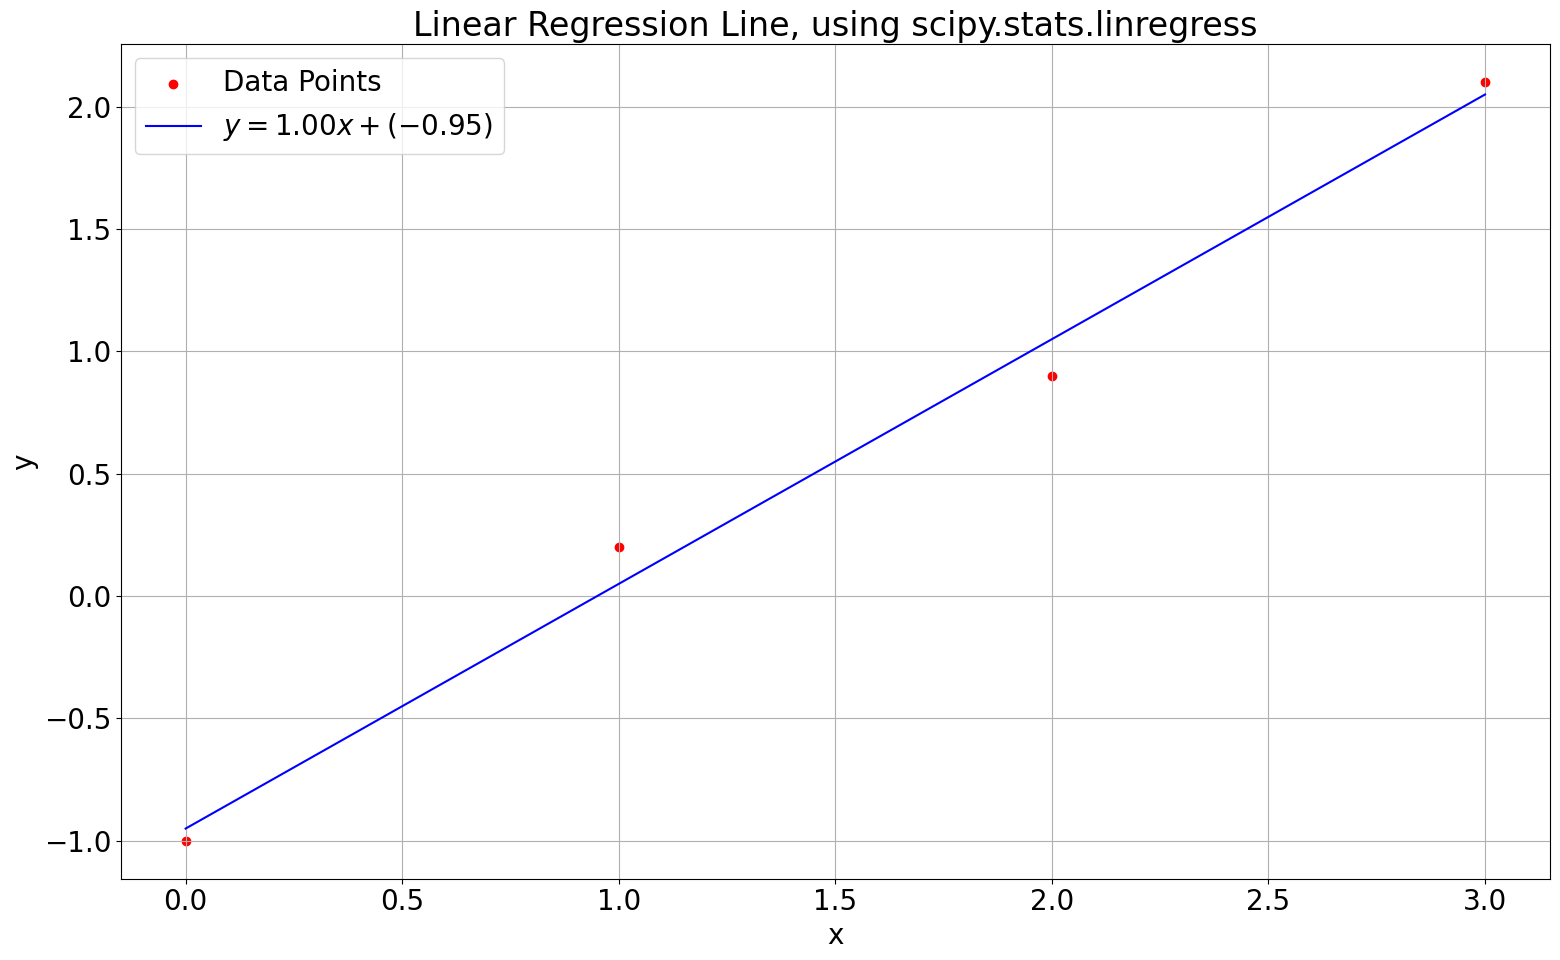

In [3]:
# Reading the data from the csv file, with no header
df = pd.read_csv(r"C:\Users\thein\OneDrive\Desktop\Bryan\Physics\3rd Year 2024-2025\Sem 1\SIF3012- Computational Physics\Coding\Tutorials\Tutorial 6\Data Question 2.csv", header=None)

# Labeling the columns
x_data = df[0]
y_data = df[1]

# Calling the linregress function
lin_fit = linregress(x_data, y_data)

# Extracting the slope and intercept
m = lin_fit.slope
c = lin_fit.intercept

# Print the results
print(f'Gradient of the best fit line = {m:.4f}')
print(f'y-intercept of the best fit line = {c:.4f}')

# Formula for the best fit line
x_fit = np.linspace(x_data.iloc[0], x_data.iloc[-1], 10000)
y_fit = m * x_fit + c

# Plot the data points and the best fit line
plt.scatter(x_data, y_data, color='red', label='Data Points')  # Scatter plot
plt.plot(x_fit, y_fit, color='blue', label=f'$y = {m:.2f}x + ({c:.2f})$')  # Fit line

# Customize plot
plt.title('Linear Regression Line, using scipy.stats.linregress')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### Question 3

### You are given a code, t6q3.py that reads a CSV file with A text header and having the comma delimiter, t6q2.csv. The data in the CSV file is the same as in Question 1. The output should also be the same with Question 1.

#### Q3 Answer:

For this question, we'll use scipy.optimize.curve_fit to plot the linear regression line. The advantage of using this library is that we can modify the fit line with other types of function, such as polynomial and exponential functions.

(array([ 1.  , -0.95]), array([[ 0.005 , -0.0075],
       [-0.0075,  0.0175]]))
Coefficient of x^ 1  = 1
Coefficient of x^ 0  = -0.95


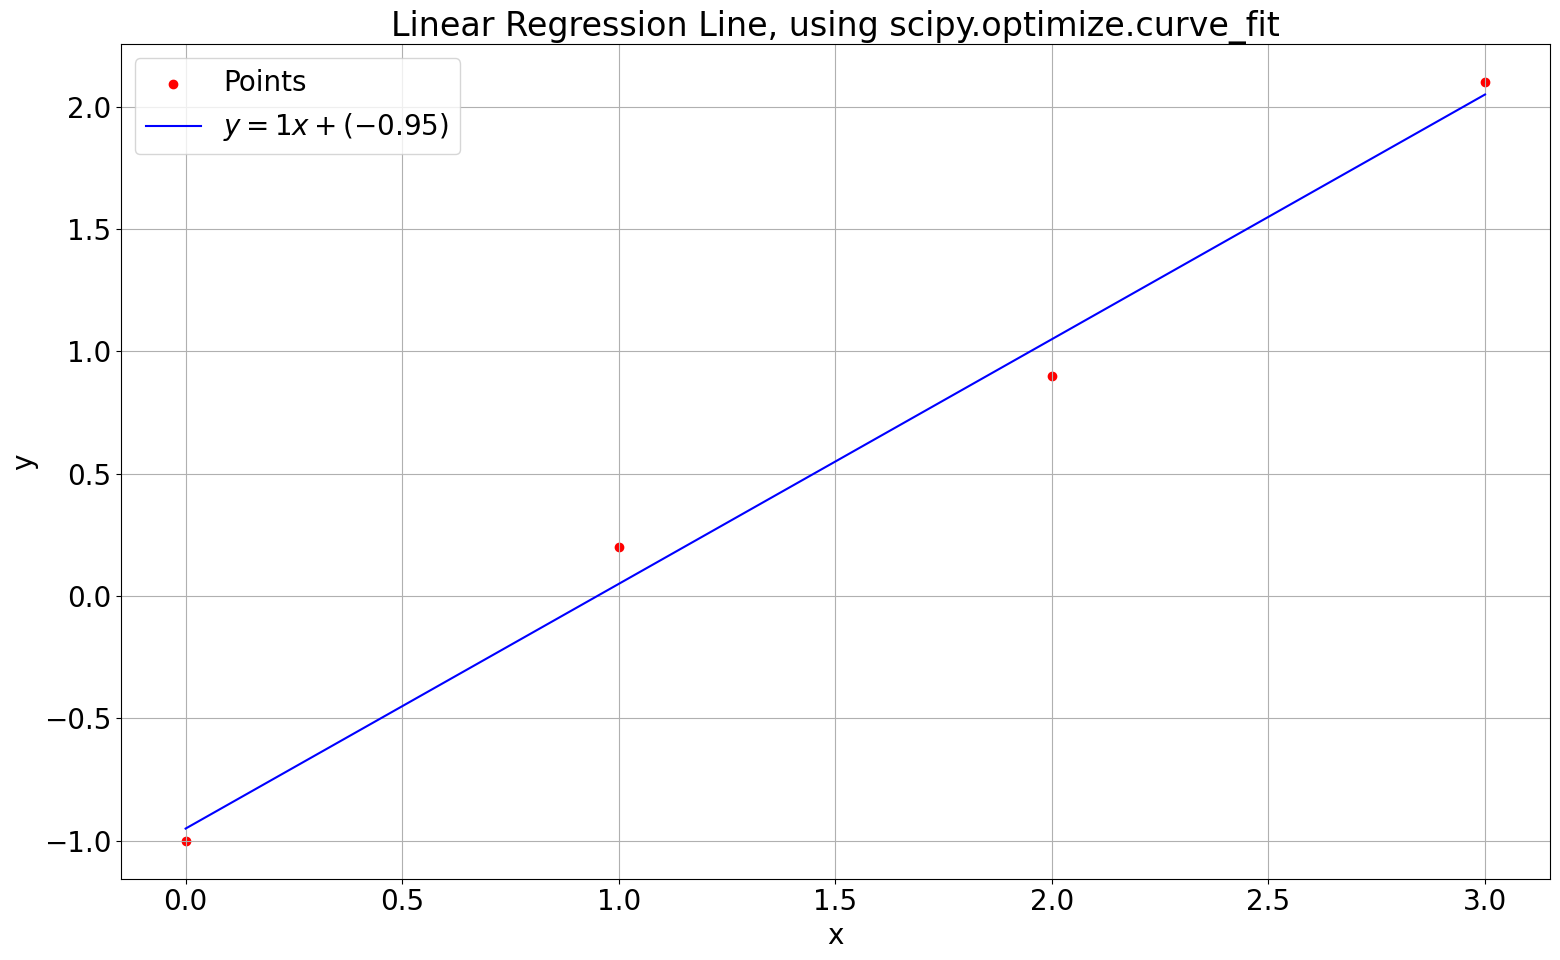

In [4]:
# Reading the data from the csv file, with header
df = pd.read_csv(r"C:\Users\thein\OneDrive\Desktop\Bryan\Physics\3rd Year 2024-2025\Sem 1\SIF3012- Computational Physics\Coding\Tutorials\Tutorial 6\Data Question 3.csv", skiprows = 0)

# Labeling the columns
x_data = df['x']
y_data = df['y']

from scipy.optimize import curve_fit

# Define linear function
def fitline(x, a, b):
    return a * x + b

# Fit model
params, covariance = curve_fit(fitline, x_data, y_data)

print(curve_fit(fitline, x_data, y_data))

degree_poly = 1

x_fit = np.linspace(x_data.iloc[0], x_data.iloc[-1], 10000)

# Printing the coefficients
for i in range(degree_poly + 1):
    print('Coefficient of x^', degree_poly - i, ' =', f'{params[i]:.6g}')

# Plotting
plt.scatter(x_data, y_data, color='red', label='Points')  # Scatter plot
plt.plot(x_fit, fitline(x_fit, *params), color='blue', label=f'$y={params[0]:.4g}x + ({params[1]:.4g})$')  # Fit line
plt.title('Linear Regression Line, using scipy.optimize.curve_fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### Question 4

### You are given a data on Hooke’s Law as shown in the Chapter 6 slides:

| $m$ (kg) | $l$ (cm) |
| :----: | :----: |
| 2 | 42.0 |
| 4 | 48.4 |
| 6 | 51.3 |
| 8 | 56.4 |
| 10 | 58.6 |

### a) Create a CSV file with a text header i.e., $m$ (kg) and $l$ (cm) just like in Question 3 for the data and save as t6q4_decker.csv.
### b) Modify the code in Question 3, t6q3.py to do the least squares fitting and save as t6q4_4b.py and the png file as t6q4_4b.png.

#### Q4 Answer:

For this question, we'll use the np.polyfit function to plot the linear regression line. The advantage of using this library is that we can easily change the degree of the polynomial to suit our needs, such as quadratic function (by changing the degree to 2) or cubic (by changing the degree to 3).

Coefficient of x^ 1  = 2.055
Coefficient of x^ 0  = 38.99


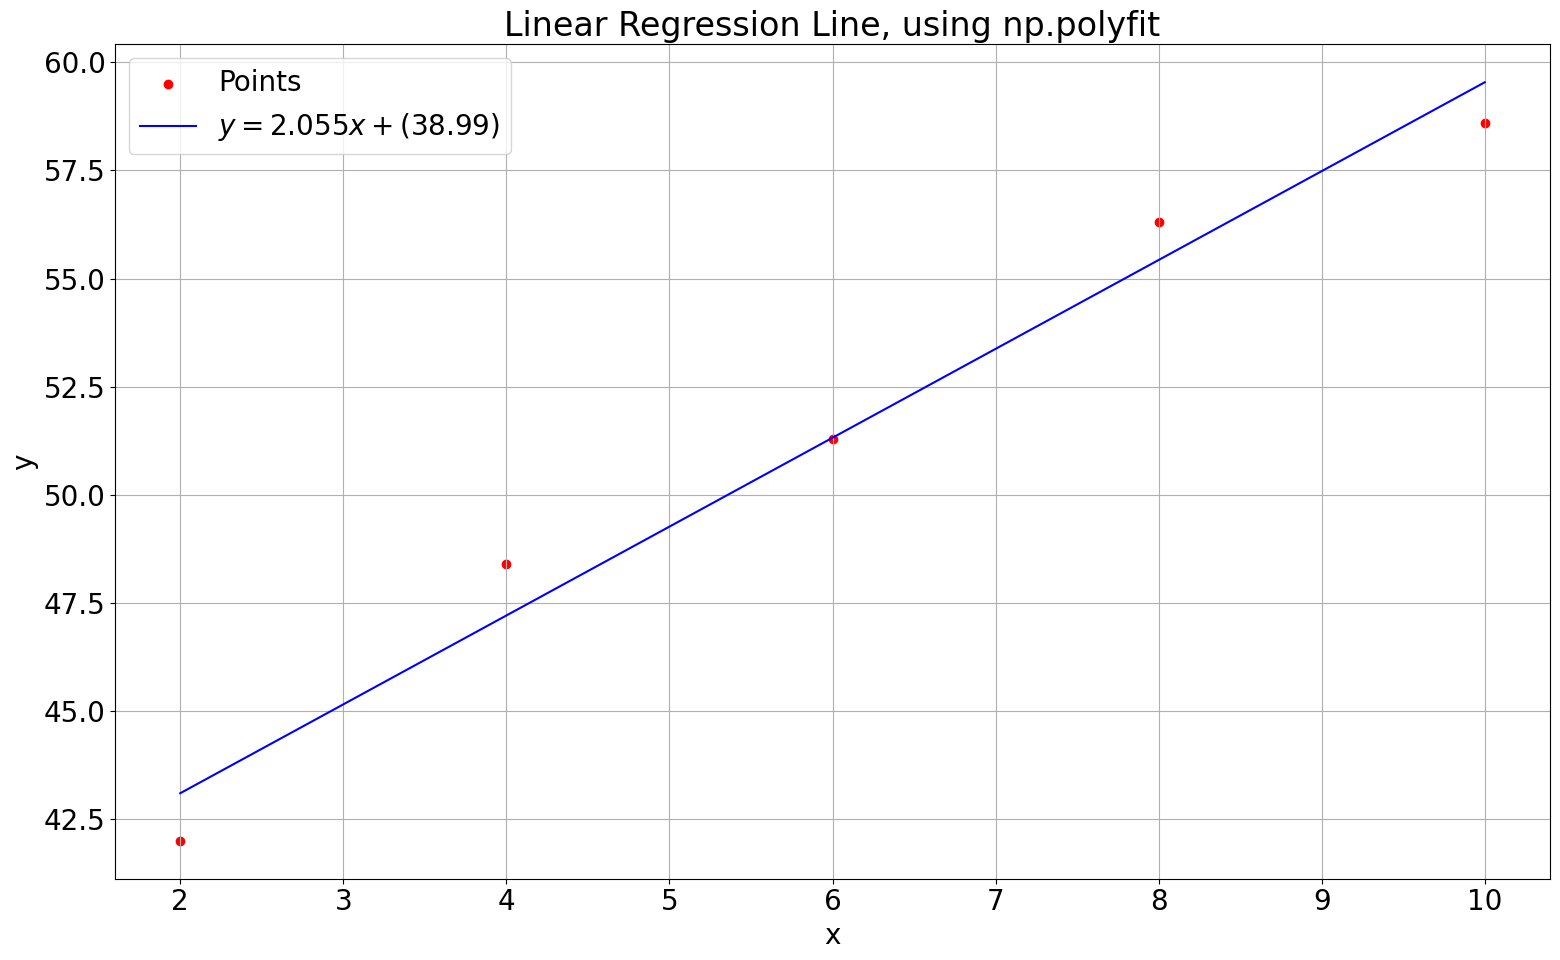

In [5]:
df = pd.read_csv(r"C:\Users\thein\OneDrive\Desktop\Bryan\Physics\3rd Year 2024-2025\Sem 1\SIF3012- Computational Physics\Coding\Tutorials\Tutorial 6\Data Question 4.csv", skiprows = 0)

x_data = df['m (kg)']
y_data = df['l (cm)']

# Setting the degree of the polynomial
degree_poly = 1

# Calculating the coefficients of the polynomial
coeff = np.polyfit(x_data, y_data, degree_poly)

# Printing the coefficients
for i in range(degree_poly + 1):
    print('Coefficient of x^', degree_poly - i, ' =', f'{coeff[i]:.6g}')

# Creating the polynomial
fitline = np.poly1d(coeff)

# Creating the x values for the fit line
x_fit = np.linspace(x_data.iloc[0], x_data.iloc[-1], 10000)

# Plotting the data
plt.scatter(x_data, y_data, color='red', label='Points')  # Scatter plot
plt.plot(x_fit, fitline(x_fit), color='blue', label=f'$y={coeff[0]:.4g}x + ({coeff[1]:.4g})$')  # Fit line
plt.title('Linear Regression Line, using np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### Question 5

### You are given a data on the conductivity of mercury as a function of temperature:

| Temperature (K) | Conductivity (W/cmK) |
| :----: | :----: |
| 300 | 0.084 |
| 400 | 0.098 |
| 500 | 0.109 |
| 600 | 0.120 |
| 700 | 0.127 |

### and a code, t6q5.py that implement the least squares fitting and quadratic fitting to the data. The code reads a CSV file with TWO text headers and having the comma delimiter, t6q5.csv in the Spectrum. A prediction for the conductivity is calculated at a selected temperature and a png graph is also produced. Run the code to understand the python code.

#### Q5 Answer:

For the first part, we use np.polyfit, with degree of 2 to plot the quadratic regression line.

Coefficient of x^ 2  = -1e-07
Coefficient of x^ 1  = 0.000208
Coefficient of x^ 0  = 0.0306
Value of conductivity at 350 K = 0.09115000000000005


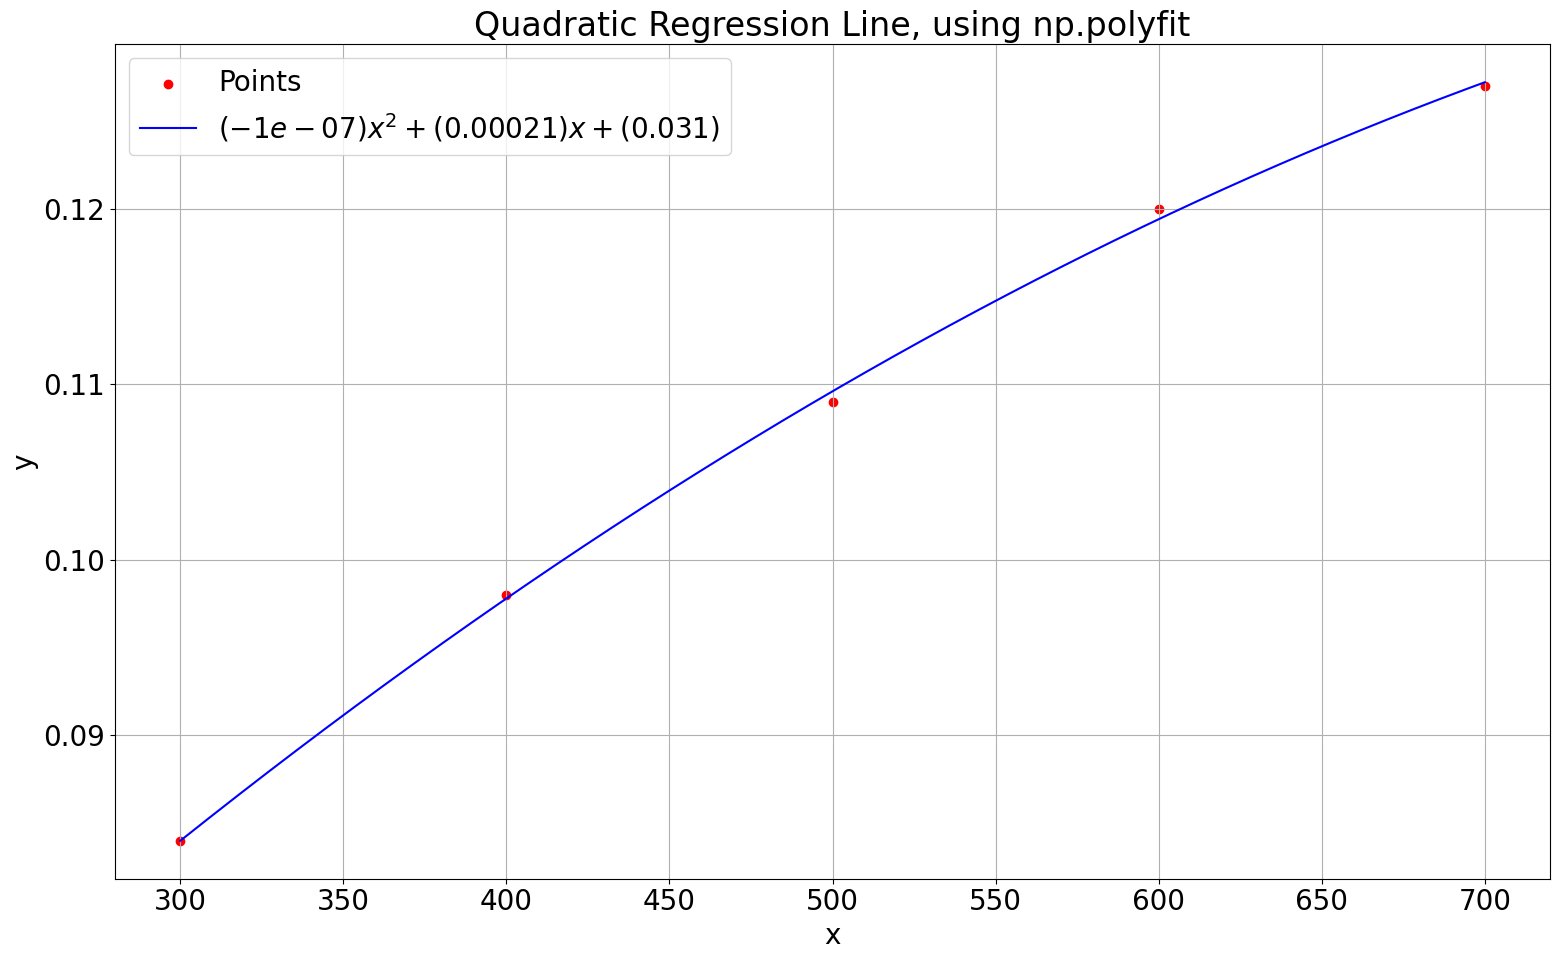

In [6]:
df = pd.read_csv(r"C:\Users\thein\OneDrive\Desktop\Bryan\Physics\3rd Year 2024-2025\Sem 1\SIF3012- Computational Physics\Coding\Tutorials\Tutorial 6\Data Question 5.csv", skiprows = 0)

x_data = df['Temperature (K)']
y_data = df['Conductivity (W/cmK)']

# Setting the degree of the polynomial
degree_poly = 2

# Calculating the coefficients of the polynomial
coeff = np.polyfit(x_data, y_data, degree_poly)

# Printing the coefficients
for i in range(degree_poly + 1):
    print('Coefficient of x^', degree_poly - i, ' =', f'{coeff[i]:.6g}')

# Creating the polynomial
fitline = np.poly1d(coeff)

# Creating the x values for the fit line
x_fit = np.linspace(x_data.iloc[0], x_data.iloc[-1], 10000)

value_of_x = 350
value_of_y = fitline(value_of_x)
print(f'Value of conductivity at {value_of_x} K =', value_of_y)

# Plotting the data
plt.scatter(x_data, y_data, color='red', label='Points')  # Scatter plot
plt.plot(x_fit, fitline(x_fit), color='blue', label=f'$\\left({coeff[0]:.2g}\\right)x^2+\\left({coeff[1]:.2g}\\right)x+\\left({coeff[2]:.2g}\\right)$')  # Fit line
plt.title('Quadratic Regression Line, using np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

Next, we change the degree of the polynomial to 1, as we want to plot for the linear regression curve.

Coefficient of x^ 1  = 0.000108
Coefficient of x^ 0  = 0.0536
Value of conductivity at 350 K = 0.09140000000000004


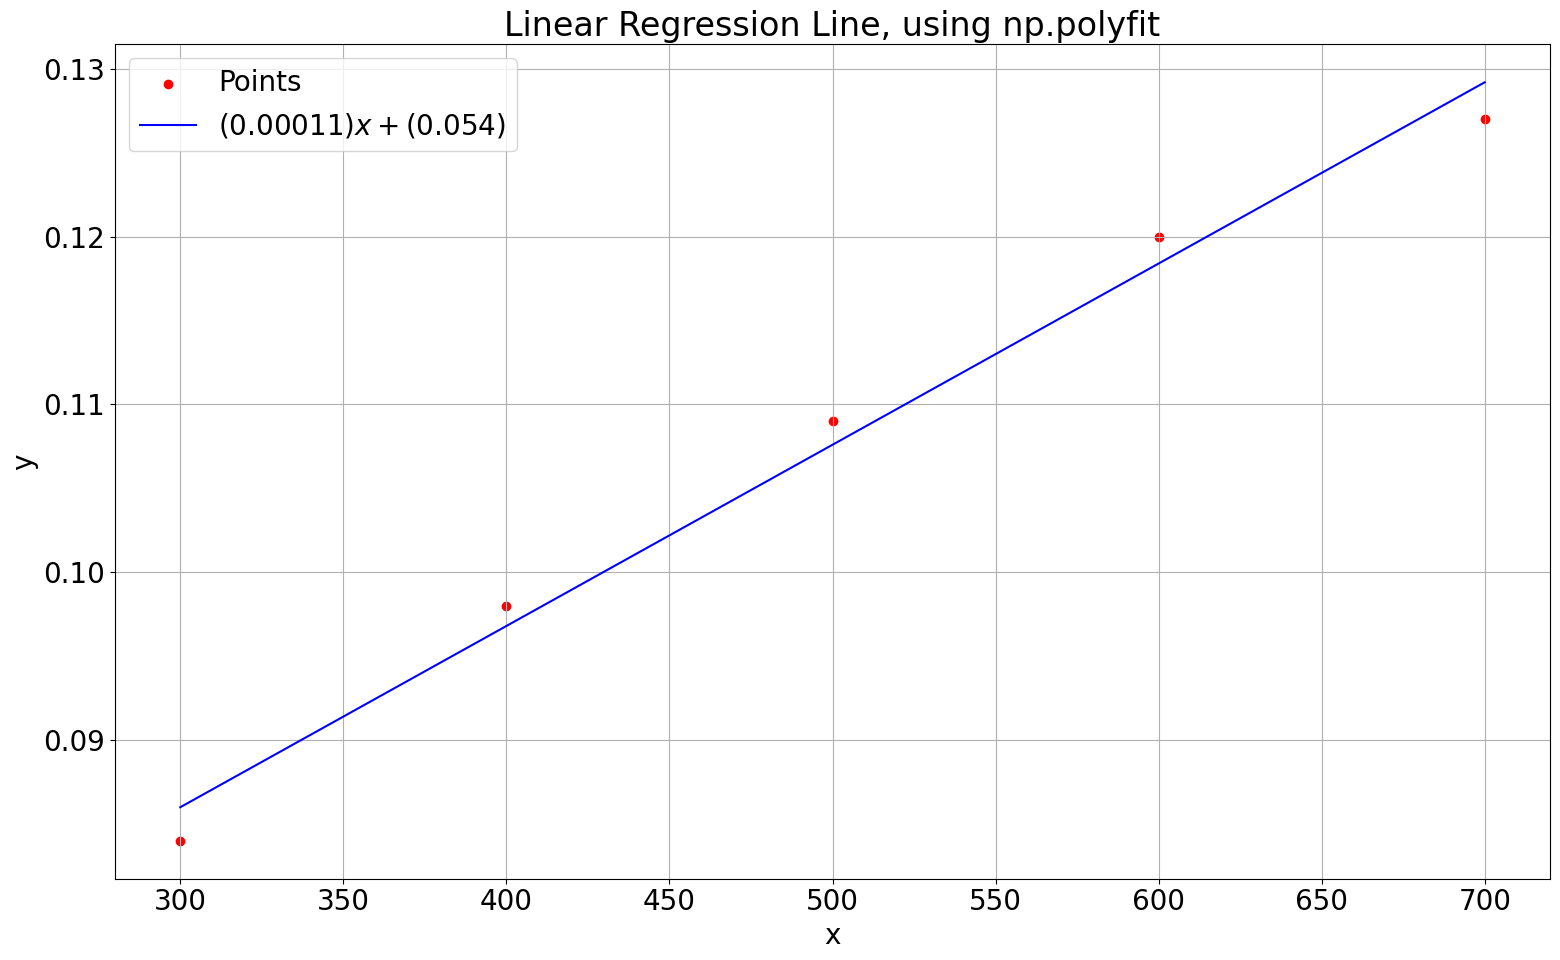

In [7]:
df = pd.read_csv(r"C:\Users\thein\OneDrive\Desktop\Bryan\Physics\3rd Year 2024-2025\Sem 1\SIF3012- Computational Physics\Coding\Tutorials\Tutorial 6\Data Question 5.csv", skiprows = 0)

x_data = df['Temperature (K)']
y_data = df['Conductivity (W/cmK)']

# Setting the degree of the polynomial
degree_poly = 1

# Calculating the coefficients of the polynomial
coeff = np.polyfit(x_data, y_data, degree_poly)

# Printing the coefficients
for i in range(degree_poly + 1):
    print('Coefficient of x^', degree_poly - i, ' =', f'{coeff[i]:.6g}')

# Creating the polynomial
fitline = np.poly1d(coeff)

# Creating the x values for the fit line
x_fit = np.linspace(x_data.iloc[0], x_data.iloc[-1], 10000)

value_of_x = 350
value_of_y = fitline(value_of_x)
print(f'Value of conductivity at {value_of_x} K =', value_of_y)

# Plotting the data
plt.scatter(x_data, y_data, color='red', label='Points')  # Scatter plot
plt.plot(x_fit, fitline(x_fit), color='blue', label=f'$\\left({coeff[0]:.2g}\\right)x+\\left({coeff[1]:.2g}\\right)$')  # Fit line
plt.title('Linear Regression Line, using np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### Question 6
### a) You are given a code, t6q6.py for the linear regression machine learning algorithm. It generates a random dataset of size 100 with 𝑥 as the single input variable to the following linear equation with added noise:
$$\begin{aligned}\Large{y=2x+5+\text{noise} }\end{aligned}$$
### where the random variable noise is added to create noise to the dataset by using the random number generator, random.uniform from numpy.

### b) The code uses the linear regression algorithm, LinearRegression and fit within the scikit learn package to create and fit the dataset to a linear regression model.

### c) After fitting the model in Step (b), the code prints out the coefficients of the linear equation. Then coef_ and intercept_ are used to obtain the gradient and intercept. The random dataset in (a) i.e. (x,y) is plotted using scatterplot and includes the linear equation as well. The plot is saved as t6q6.png.

### d) Prediction to some values of 𝑥 can be made using the code.

#### Q6 Answer:

The coefficient =  [1.98726667]
The intercept =  7.0754033423588965
Predictions using the linear regression supervised learning algorithm
Selected x values:  [ 50 100 150 200]
Method 1:  [106.43873666 205.80206998 305.1654033  404.52873662]
Method 2:  [106.43873666 205.80206998 305.1654033  404.52873662]


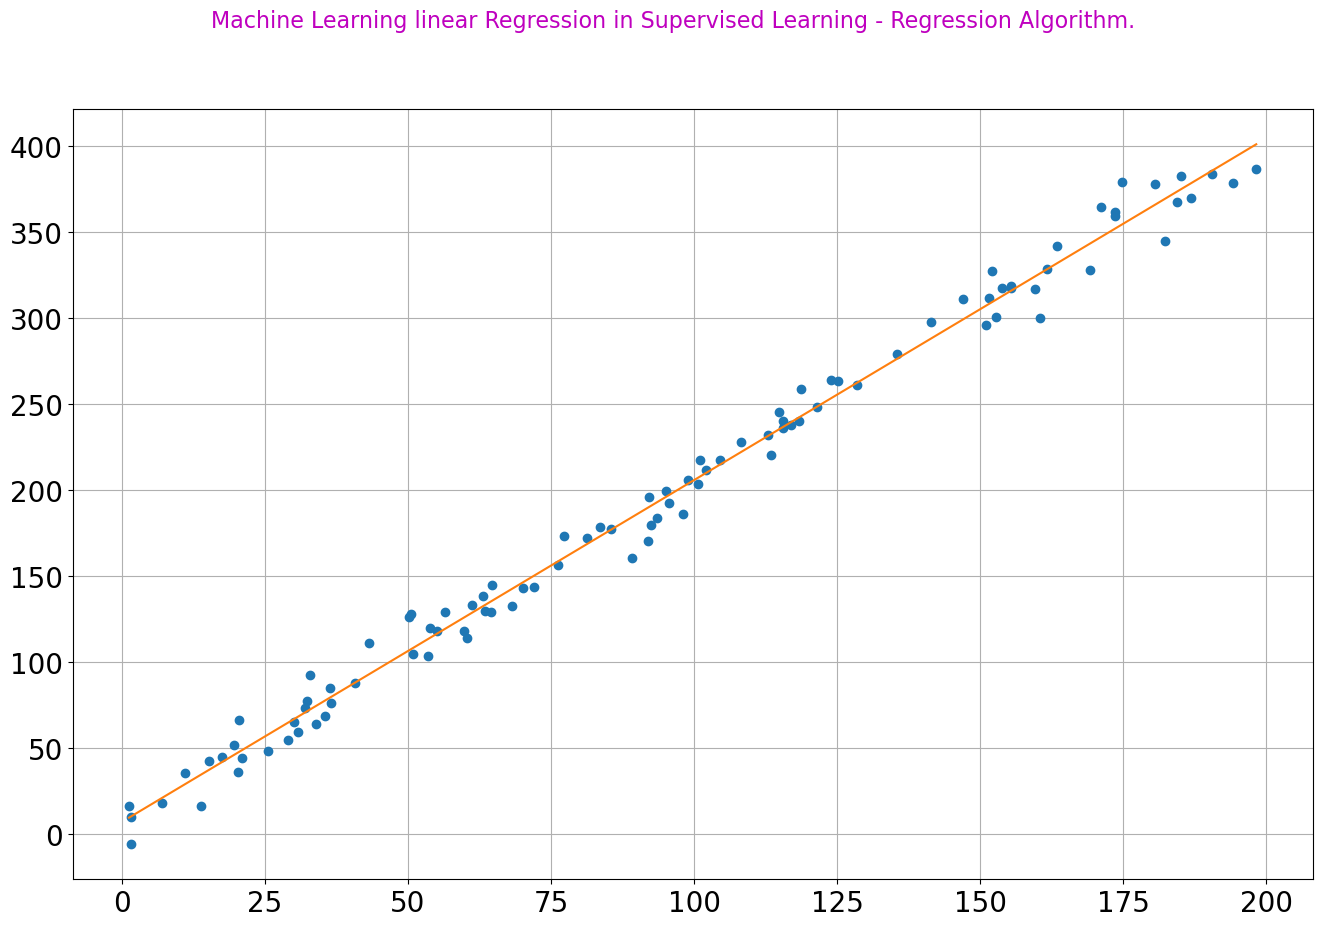

<Figure size 1600x1000 with 0 Axes>

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May  2 23:29:35 2021

@author: hasanabukassim
"""

# The steps are described in Tutorial 4 Question 6.

#----------------------------------------------------------------------------#

# Step 1: Import python packages

import numpy as np
# Imports only the linear model function from Scikit Learn package.
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------#

# Step 2: Generate random training dataset

# Generate a random dataset (input/observation) of size nobs.
# Note: change this according to the problem to solve.
nobs = 100   

# Create the random dataset for the input/observation with size nobs with selected minimum value (low) and maximum value (high).
# Note: change this according to the problem to solve.
xobs = np.random.uniform(low=0.0, high=200.0, size=nobs)

# The random variable noise is added to create noise to the dataset
# to make the dataset distribution looks more "random".
noise = np.random.normal(loc=0.0, scale=10.0, size=nobs)

# Set yobs (the output) as a linear relationship with xobs (input/observation).
# Note: change this according to the problem to solve. 
#yobs=0.07059*xobs + noise

yobs = 2*xobs + 5 + noise

#----------------------------------------------------------------------------#

# Step 3: Fit Linear regression model. There are different names for x and y described in Question 6.
# Follow the steps to use the sklearn package.

# 1. xobs is reshaped from a numpy array to a matrix by using reshape, which is required by the sklearn package and is the features.
# The value -1 is the number of rows from the original xobs, the value 1 is representing 1 column in the original xobs.
x = xobs.reshape(-1, 1)

# 2. Set yobs as the target in the supervised learning-regression analysis.
y = yobs

# 3. Creating the linear regression model. LinearRegression fits a linear model with coefficients calculated/returned to lr.
lr = LinearRegression()

# 4. The coefficients in lr are fitted to a linear model i.e. y = f(x) = a0#x + a1. fit(x, y) fits a linear model.
lr.fit(x, y)

# 4. Print the coefficient and intercept of the linear model.
# The coefficients:
print('The coefficient = ',lr.coef_)
# The intercept:
print('The intercept = ',lr.intercept_)

# 5. Plot the training set and the supervised linear model.

# Create a new figure, or activate an existing figure.   
fig = plt.figure(figsize=(16,10))
# Title of figure:
   # color='magenta'
fig.suptitle('Machine Learning linear Regression in Supervised Learning - \
Regression Algorithm.',color='m', fontsize=16)

#    The original training set (points).
#    Plot the random sample dataset (training set) using a scatterplot
plt.plot(xobs, yobs, 'o')

#   The supervised linear model (linear line).
#   Plot the linear model using a line.
#   linspave returns num evenly spaced samples/grid, calculated over the
#   interval [start, stop]. num = (integer) number of samples to generate. 
xgrid = np.linspace(xobs.min(), xobs.max(), num=100)
plt.plot(xgrid, lr.coef_[0]*xgrid + lr.intercept_)

#----------------------------------------------------------------------------#

# Step 4: Predictions with the linear regression using 2 methods

# xpredict = the selected x values we want to predict y.
xpredict = np.array([50, 100, 150, 200])

# Method 1. Use the linear equation,  y = f(x) = a0#x + a1.
#           ypredict1 = predicted y using xpredict
ypredict1 = lr.intercept_ + xpredict*lr.coef_[0]

# Method 2. Use the predict function in scikit-learn.
#           ypredict2 = predicted y using xpredict
ypredict2=lr.predict(xpredict.reshape(-1,1))

# Print the predictions from the two methods.
# Both methods should return the same predicted values.
print('Predictions using the linear regression supervised learning algorithm')
print('Selected x values: ', xpredict)
print('Method 1: ', ypredict1)
print('Method 2: ', ypredict2)

#----------------------------------------------------------------------------#

# Plot the graphs.
plt.show()

# Save the graph in the png format in an external file.
plt.savefig('t4q6.png')

### Question 7

### Question 7 repeats Question but now the code, t6q7.py is for the polynomial regression with equation given by:
$$\begin{aligned}\Large{y=x^2+3x+7+\text{noise} }\end{aligned}$$

### Notice that the linear regression gives poor fit to the dataset.

***The Linear Model***
The coefficient =  [22.6081803]
The intercept =  -59.952072448883996
Predictions using the linear regression supervised learning algorithm
Selected x values:  [ 50 100 150 200]
Method 1:  [1070.45694254 2200.86595752 3331.27497251 4461.68398749]
Method 2:  [1070.45694254 2200.86595752 3331.27497251 4461.68398749]

*** The Polynomial Model ***
The coefficients =  [2.57302181 1.01701096]
The intercept =  8.298365147355298
Predictions using the linear regression supervised learning algorithm
Selected x values:  [ 50 100 150 200]
Method 1:  [ 2679.47685845 10435.71015745 23276.99826214 41203.34117252]
Method 2:  [1070.45694254 2200.86595752 3331.27497251 4461.68398749]


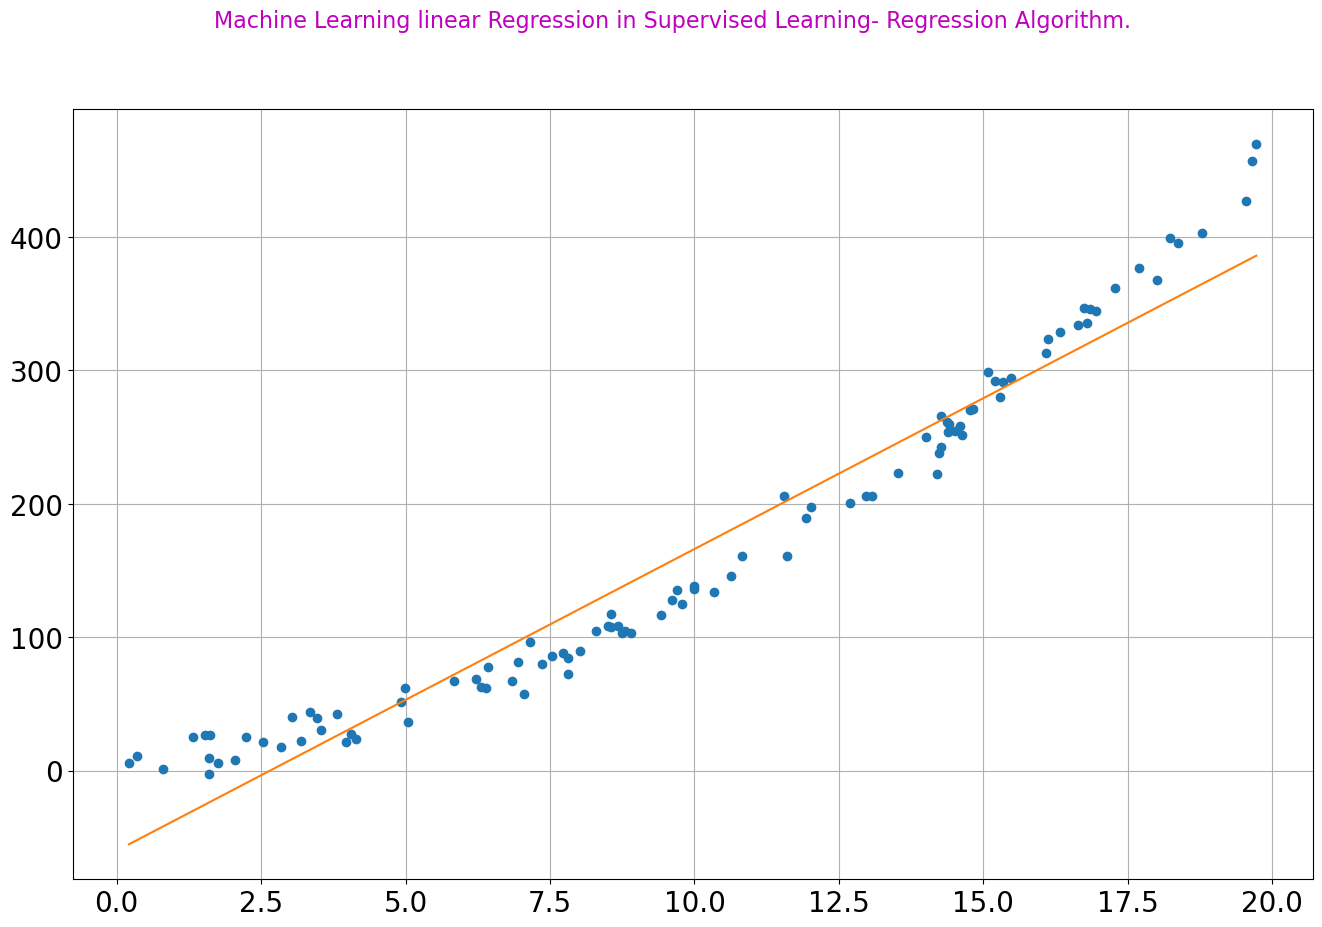

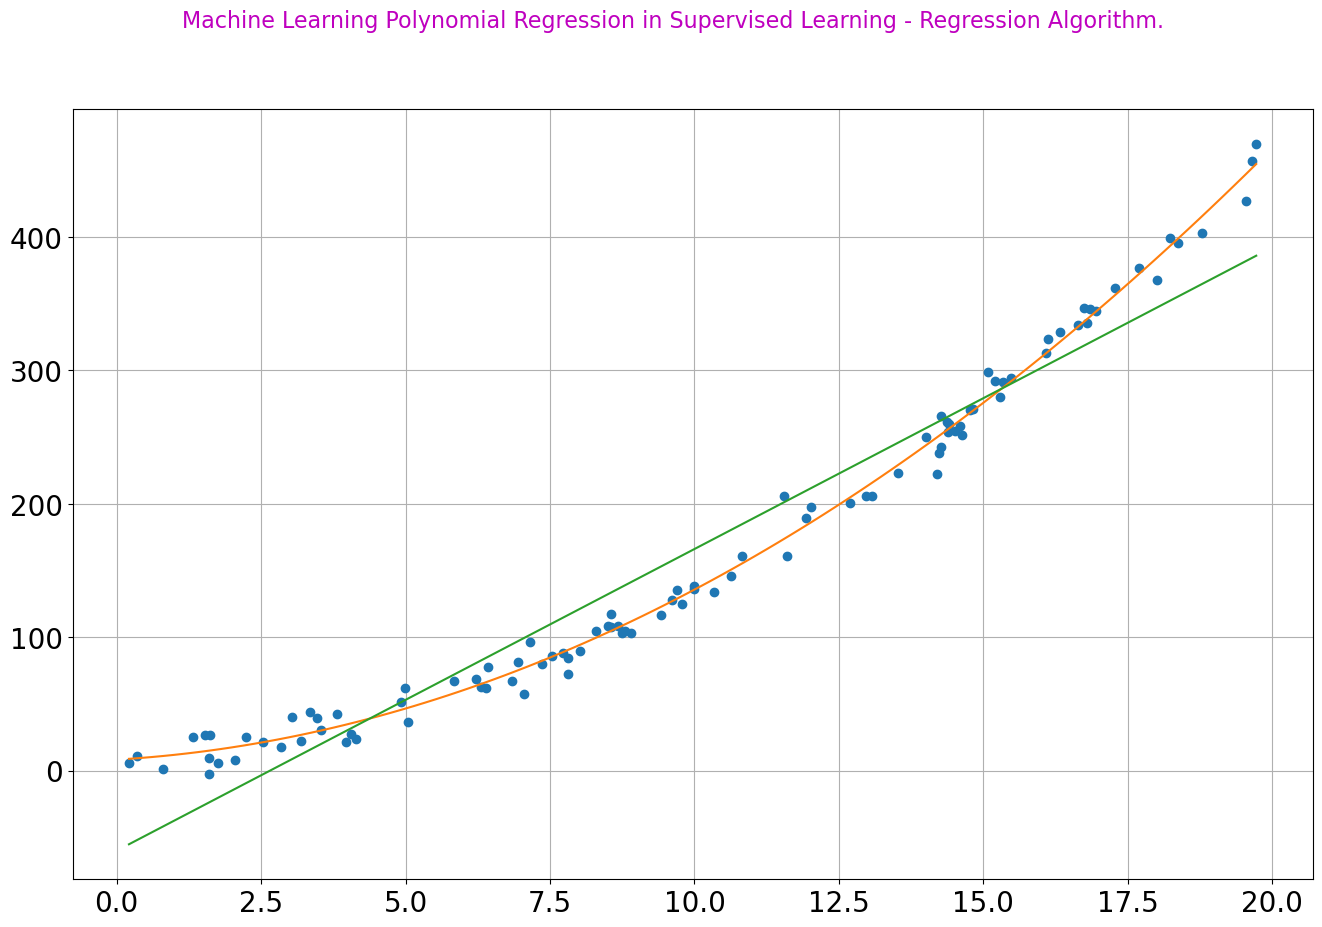

<Figure size 1600x1000 with 0 Axes>

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May  2 23:29:35 2021

@author: hasanabukassim
"""

# The steps are described in Tutorial 4 Question 6.

#----------------------------------------------------------------------------#

# Step 1: Import python packages

import numpy as np
# Imports only the linear model function from Scikit Learn package.
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------#

# Step 2: Generate random training dataset

# Generate a random dataset (input/observation) of size nobs.
# Note: change this according to the problem to solve.
nobs = 100   

# Create the random dataset for the input/observation with size nobs
# with selected minimum value (low) and maximum value (high).
# Note: change this according to the problem to solve.
xobs = np.random.uniform(low=0.0, high=20.0, size=nobs)

# The random variable noise is added to create noise to the dataset
# to make the dataset distribution looks more "random".
noise = np.random.normal(loc=0.0, scale=10.0, size=nobs)

# Set yobs (the output) as a linear relationship with xobs (input/observation).
# Note: change this according to the problem to solve. 
#yobs=0.07059*xobs + noise
yobs = 7 + 3*xobs + xobs**2 + noise

#----------------------------------------------------------------------------#

# Step 3: Fit Linear regression model. There are different names for 
#         x and y described in Question 6.
# Follow the steps to use the sklearn package.

# 1. xobs is reshaped from a numpy array to a matrix by using reshape, 
#    which is required by the sklearn package and is the features.
#    The value -1 is the number of rows from the original xobs, 
#    The value 1 is representing 1 column in the original xobs,.
x = xobs.reshape(-1, 1)

# 2. Set yobs as the target in the supervised learning-regression analysis.
y = yobs

# 3. Creating the linear regression model.
#    LinearRegression fits a linear model with coefficients calculated/returned
#    to lr.
lr = LinearRegression()

# 4. The coefficients in lr are fitted to a linear model i.e. 
#    y = f(x) = a0#x + a1.
#    fit(x, y) fits a linear model.
lr.fit(x, y)

# 4. Print the coefficient and intercept of the linear model.
print(f'***The Linear Model***')
# The coefficients:
print('The coefficient = ',lr.coef_)
# The intercept:
print('The intercept = ',lr.intercept_)

# 5. Plot the training set and the supervised linear model.

# Create a new figure, or activate an existing figure.   
fig = plt.figure(figsize=(16, 10))
# Title of figure:
   # color='magenta'
fig.suptitle('Machine Learning linear Regression in Supervised Learning- \
Regression Algorithm.',color='m', fontsize=16)

#    The original training set (points).
#    Plot the random sample dataset (training set) using a scatterplot
plt.plot(xobs, yobs, 'o')

#   The supervised linear model (linear line).
#   Plot the linear model using a line.
#   linspave returns num evenly spaced samples/grid, calculated over the
#   interval [start, stop]. num = (integer) number of samples to generate. 
xgrid = np.linspace(xobs.min(), xobs.max(), num=100)
plt.plot(xgrid, lr.coef_[0]*xgrid + lr.intercept_)

#----------------------------------------------------------------------------#

# Step 4: Predictions with the linear regression using 2 methods

# xpredict = the selected x values we want to predict y.
xpredict = np.array([50, 100, 150, 200])

# Method 1. Use the linear equation,  y = f(x) = a0#x + a1.
#           ypredict1 = predicted y using xpredict
ypredict1 = lr.intercept_ + xpredict*lr.coef_[0]

# Method 2. Use the predict function in scikit-learn.
#           ypredict2 = predicted y using xpredict
ypredict2=lr.predict(xpredict.reshape(-1,1))

# Print the predictions from the two methods.
# Both methods should return the same predicted values.
print('Predictions using the linear regression supervised learning algorithm')
print('Selected x values: ', xpredict)
print('Method 1: ', ypredict1)
print('Method 2: ', ypredict2)

#----------------------------------------------------------------------------#

# Step 5: linear regression Steps 2 - 4, does not fit the polynomial well.
#       This due to the linear equation does not have x^2 term.
#       The linear regression line could not accurately predict any new 
#       observations.
#       This is known as underfitting.
#       Thus we add the x^2 term.
# 1.    We repeat Step 3 at line number 52 but add the x^2 term. We do this by
#       combining xobs and xobs**2 as a matrix x2
x2 = np.array(list(zip(xobs, xobs**2)))

# 2. Set yobs as the target in the supervised learning-regression analysis.
y2 = yobs

# 3. Creating the linear regression model.
#    LinearRegression fits a linear model with coefficients calculated/returned
#    to lr.
lr2 = LinearRegression()

# 4. The coefficients in lr are fitted to a linear model i.e. 
#    y = f(x) = a0#x + a1.
#    fit(x, y) fits a linear model.
lr2.fit(x2, y2)

# 4. Print the coefficient and intercept of the polynomial model.
print()
print('*** The Polynomial Model ***')
# The coefficients:
print('The coefficients = ',lr2.coef_)
# The intercept:
print('The intercept = ',lr2.intercept_)

# 5. Plot the training set and the supervised linear model.

# Create a new figure, or activate an existing figure.   
fig = plt.figure(figsize=(16, 10))
# Title of figure:
   # color='magenta'
fig.suptitle('Machine Learning Polynomial Regression in Supervised Learning - \
Regression Algorithm.',color='m', fontsize=16)

#    The original training set (points).
#    Plot the random sample dataset (training set) using a scatterplot
plt.plot(xobs, yobs, 'o')

#   The supervised linear model (linear line).
#   Plot the linear model using a line.
#   linspave returns num evenly spaced samples/grid, calculated over the
#   interval [start, stop]. num = (integer) number of samples to generate. 
xgrid = np.linspace(xobs.min(), xobs.max(), num=100)
plt.plot(xgrid, lr2.coef_[0]*xgrid + lr2.coef_[1]*xgrid**2 + lr2.intercept_)

# Show also the linear regression in the polynomial plot.
plt.plot(xgrid, lr.coef_[0]*xgrid + lr.intercept_)

#----------------------------------------------------------------------------#

# Step 6: Predictions with the linear regression using 2 methods

# xpredict = the selected x values we want to predict y.
xpredict = np.array([50, 100, 150, 200])

# Method 1. Use the linear equation,  y = f(x) = a0#x + a1.
#           ypredict1 = predicted y using xpredict
ypredict3 = lr2.coef_[0]*xpredict + lr2.coef_[1]*xpredict**2 + lr2.intercept_

# Method 2. Use the predict function in scikit-learn.
#           ypredict2 = predicted y using xpredict
ypredict4=lr.predict(xpredict.reshape(-1,1))

# Print the predictions from the two methods.
# Both methods should return the same predicted values.
print('Predictions using the linear regression supervised learning algorithm')
print('Selected x values: ', xpredict)
print('Method 1: ', ypredict3)
print('Method 2: ', ypredict4)

#----------------------------------------------------------------------------#

# Plot the graphs.
plt.show()

# Save the graph in the png format in an external file.
plt.savefig('t4q7.png')